## Fuente: https://github.com/GoogleTrends/data/tree/master

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words import get_stop_words
from collections import Counter
import random



sns.reset_defaults()

datatrooper_palette = [
    "#E6D3AD",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

plt.style.use('fivethirtyeight')
sns.set_palette(datatrooper_palette)
#  #1D1D3D o black
sns.set(rc={'axes.facecolor':'#1D1D3D', 'figure.facecolor':'#1D1D3D'})

sns.set_context("talk")
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
df = pd.read_csv("../../../data/sw.csv")

In [3]:
df

,Date,Aayla,Admiral Ackbar,Anakin Skywalker,Asaj,BB-8,Boba Fett,Captain Rex,Chewbacca,Commander Cody,...,Rey,Rose Tico,Sabé,Senator Bail Organa,Snoke,Wampa,Watto,Wedge Antilles,Wilhuf,Yoda
0,Jan 2004,0.18,0.26,5.78,0.07,0.04,1.43,0.00,1.82,0.00,...,2.39,0.00,0.18,0.04,0.09,0.11,0.04,0.04,0.20,5.32
1,Feb 2004,0.13,0.26,4.89,0.11,0.04,1.24,0.00,1.67,0.09,...,2.69,0.00,0.15,0.09,0.09,0.13,0.09,0.15,0.26,4.70
2,Mar 2004,0.11,0.38,5.96,0.21,0.08,1.37,0.00,1.96,0.00,...,2.79,0.00,0.11,0.05,0.27,0.21,0.13,0.16,0.21,5.02
3,Apr 2004,0.06,0.33,6.75,0.25,0.04,1.55,0.00,1.67,0.04,...,2.51,0.00,0.08,0.08,0.04,0.06,0.06,0.04,0.25,5.66
4,May 2004,0.11,0.38,5.90,0.18,0.04,1.24,0.00,2.48,0.00,...,2.26,0.00,0.13,0.04,0.11,0.09,0.05,0.07,0.18,4.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Dec 2018,0.12,0.22,12.16,0.18,2.23,1.53,0.17,3.89,0.07,...,3.57,0.09,0.08,0.06,1.00,0.19,0.08,0.04,0.26,6.08
180,Jan 2019,0.13,0.21,9.98,0.19,1.35,1.28,0.16,3.11,0.07,...,3.43,0.07,0.08,0.08,0.76,0.15,0.09,0.03,0.25,4.98
181,Feb 2019,0.12,0.20,9.79,0.16,1.06,1.26,0.14,2.93,0.06,...,3.13,0.09,0.07,0.05,0.70,0.15,0.10,0.03,0.27,5.02
182,Mar 2019,0.11,0.18,8.96,0.17,0.94,1.17,0.15,2.73,0.06,...,2.96,0.06,0.07,0.06,0.60,0.13,0.10,0.04,0.23,4.86


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Aayla,Admiral Ackbar,Anakin Skywalker,Asaj,BB-8,Boba Fett,Captain Rex,Chewbacca,Commander Cody,...,Rey,Rose Tico,Sabé,Senator Bail Organa,Snoke,Wampa,Watto,Wedge Antilles,Wilhuf,Yoda
0,2004-01-01,0.18,0.26,5.78,0.07,0.04,1.43,0.0,1.82,0.00,...,2.39,0.0,0.18,0.04,0.09,0.11,0.04,0.04,0.20,5.32
1,2004-02-01,0.13,0.26,4.89,0.11,0.04,1.24,0.0,1.67,0.09,...,2.69,0.0,0.15,0.09,0.09,0.13,0.09,0.15,0.26,4.70
2,2004-03-01,0.11,0.38,5.96,0.21,0.08,1.37,0.0,1.96,0.00,...,2.79,0.0,0.11,0.05,0.27,0.21,0.13,0.16,0.21,5.02
3,2004-04-01,0.06,0.33,6.75,0.25,0.04,1.55,0.0,1.67,0.04,...,2.51,0.0,0.08,0.08,0.04,0.06,0.06,0.04,0.25,5.66
4,2004-05-01,0.11,0.38,5.90,0.18,0.04,1.24,0.0,2.48,0.00,...,2.26,0.0,0.13,0.04,0.11,0.09,0.05,0.07,0.18,4.68


In [5]:
mask = (df['Date'] > '2004-01-01') & (df['Date'] <= '2008-12-01')
df_1 = df.loc[mask]
df_1.head()
# mask = (df['Date'] > '2009-01-01') & (df['Date'] <= '2013-12-01')
# df_2 = df.loc[mask]
# df_2.head()
# mask = (df['Date'] > '2014-01-01') & (df['Date'] <= '2018-12-01')
# df_3 = df.loc[mask]
# df_3.tail()

,Date,Aayla,Admiral Ackbar,Anakin Skywalker,Asaj,BB-8,Boba Fett,Captain Rex,Chewbacca,Commander Cody,...,Rey,Rose Tico,Sabé,Senator Bail Organa,Snoke,Wampa,Watto,Wedge Antilles,Wilhuf,Yoda
1,2004-02-01,0.13,0.26,4.89,0.11,0.04,1.24,0.0,1.67,0.09,...,2.69,0.0,0.15,0.09,0.09,0.13,0.09,0.15,0.26,4.70
2,2004-03-01,0.11,0.38,5.96,0.21,0.08,1.37,0.0,1.96,0.00,...,2.79,0.0,0.11,0.05,0.27,0.21,0.13,0.16,0.21,5.02
3,2004-04-01,0.06,0.33,6.75,0.25,0.04,1.55,0.0,1.67,0.04,...,2.51,0.0,0.08,0.08,0.04,0.06,0.06,0.04,0.25,5.66
4,2004-05-01,0.11,0.38,5.90,0.18,0.04,1.24,0.0,2.48,0.00,...,2.26,0.0,0.13,0.04,0.11,0.09,0.05,0.07,0.18,4.68
5,2004-06-01,0.05,0.31,5.71,0.18,0.04,1.28,0.0,1.53,0.04,...,2.50,0.0,0.16,0.07,0.09,0.13,0.07,0.00,0.16,3.80


In [6]:
df_t = df.T
df_t = df_t.drop('Date')
df_t["sum"] = df_t.sum(axis=1)

df_t_1 = df_1.T
df_t_1 = df_t_1.drop('Date')
df_t_1["sum"] = df_t_1.sum(axis=1)

df_t_2 = df_2.T
df_t_2 = df_t_2.drop('Date')
df_t_2["sum"] = df_t_2.sum(axis=1)

df_t_3 = df_3.T
df_t_3 = df_t_3.drop('Date')
df_t_3["sum"] = df_t_3.sum(axis=1)


In [7]:
df_t

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,sum
Aayla,0.18,0.13,0.11,0.06,0.11,0.05,0.09,0.05,0.18,0.13,...,0.17,0.12,0.11,0.11,0.12,0.13,0.12,0.11,0.12,41.70
Admiral Ackbar,0.26,0.26,0.38,0.33,0.38,0.31,0.28,0.19,0.22,0.36,...,0.21,0.2,0.19,0.18,0.22,0.21,0.2,0.18,0.2,66.32
Anakin Skywalker,5.78,4.89,5.96,6.75,5.9,5.71,6.49,6.92,9.94,11.12,...,9.68,9.47,10.1,9.53,12.16,9.98,9.79,8.96,9.82,2540.37
Asaj,0.07,0.11,0.21,0.25,0.18,0.18,0.17,0.09,0.18,0.18,...,0.23,0.2,0.18,0.18,0.18,0.19,0.16,0.17,0.2,45.21
BB-8,0.04,0.04,0.08,0.04,0.04,0.04,0.08,0.04,0.06,0.05,...,1.34,1.25,1.34,1.77,2.23,1.35,1.06,0.94,0.96,262.81
Boba Fett,1.43,1.24,1.37,1.55,1.24,1.28,1.69,1.96,2.1,2.19,...,1.38,1.31,1.69,1.28,1.53,1.28,1.26,1.17,1.35,351.05
Captain Rex,0,0,0,0,0,0,0.04,0.04,0,0,...,0.19,0.14,0.17,0.13,0.17,0.16,0.14,0.15,0.16,27.93
Chewbacca,1.82,1.67,1.96,1.67,2.48,1.53,1.25,1.52,2.33,2.22,...,2.78,3.18,3.69,3.11,3.89,3.11,2.93,2.73,2.54,599.13
Commander Cody,0,0.09,0,0.04,0,0.04,0.04,0.04,0.03,0.03,...,0.07,0.07,0.05,0.05,0.07,0.07,0.06,0.06,0.05,13.56
Count Dooku,0.11,0.2,0.27,0.4,0.26,0.29,0.19,0.35,0.21,0.28,...,0.46,0.39,0.42,0.44,0.56,1.04,0.58,0.53,0.52,105.67


In [8]:
personajes = list(df_t.index)

In [9]:
df_t['personajes'] = df_t.index
df_t.head()

df_t_1['personajes'] = df_t_1.index
df_t_1.head()

df_t_2['personajes'] = df_t_2.index
df_t_2.head()

df_t_3['personajes'] = df_t_3.index
df_t_3.head()



,121,122,123,124,125,126,127,128,129,130,...,172,173,174,175,176,177,178,179,sum,personajes
Aayla,0.22,0.29,0.23,0.24,0.19,0.2,0.2,0.18,0.18,0.24,...,0.13,0.14,0.12,0.17,0.12,0.11,0.11,0.12,12.41,Aayla
Admiral Ackbar,0.32,0.32,0.27,0.32,0.27,0.26,0.27,0.27,0.28,0.27,...,0.31,0.26,0.22,0.21,0.2,0.19,0.18,0.22,23.30,Admiral Ackbar
Anakin Skywalker,12.74,13.29,13.39,14.49,11.1,10.72,10.9,11,13.53,13.09,...,12.1,10.88,9.96,9.68,9.47,10.1,9.53,12.16,1046.25,Anakin Skywalker
Asaj,0.24,0.44,0.33,0.42,0.35,0.25,0.24,0.24,0.21,0.24,...,0.24,0.24,0.21,0.23,0.2,0.18,0.18,0.18,17.54,Asaj
BB-8,0.08,0.08,0.08,0.08,0.07,0.1,0.11,0.26,0.46,1.13,...,1.85,1.51,1.29,1.34,1.25,1.34,1.77,2.23,201.06,BB-8


In [10]:
df_t.sort_values(by=['sum'], inplace=True, ascending=False)
df_t.head()

df_t_1.sort_values(by=['sum'], inplace=True, ascending=False)
df_t_1.head()

df_t_2.sort_values(by=['sum'], inplace=True, ascending=False)
df_t_2.head()

df_t_3.sort_values(by=['sum'], inplace=True, ascending=False)
df_t_3.head()


,121,122,123,124,125,126,127,128,129,130,...,172,173,174,175,176,177,178,179,sum,personajes
Anakin Skywalker,12.74,13.29,13.39,14.49,11.1,10.72,10.9,11,13.53,13.09,...,12.1,10.88,9.96,9.68,9.47,10.1,9.53,12.16,1046.25,Anakin Skywalker
Yoda,6.14,5.91,5.66,6.89,5.51,5.41,5.54,5.86,6.42,6.07,...,6.38,5.32,4.98,4.88,4.88,5.49,5.34,6.08,429.83,Yoda
Leia Organa,3.85,3.51,3.28,4.27,3.6,3.4,3.36,3.54,4.57,3.83,...,5.14,3.69,3.75,3.49,3.55,4.32,3.19,3.82,365.87,Leia Organa
Kylo Ren,0.05,0.04,0.03,0.03,0.04,0.04,0.04,0.04,0.03,0.04,...,3.64,2.92,3.19,2.61,2.42,2.56,2.29,2.85,339.52,Kylo Ren
Luke Skywalker,2.84,2.55,2.75,3.28,2.6,2.49,2.75,2.6,3,3.08,...,4.25,3.38,3.57,3,2.9,3.02,2.85,3.53,324.50,Luke Skywalker


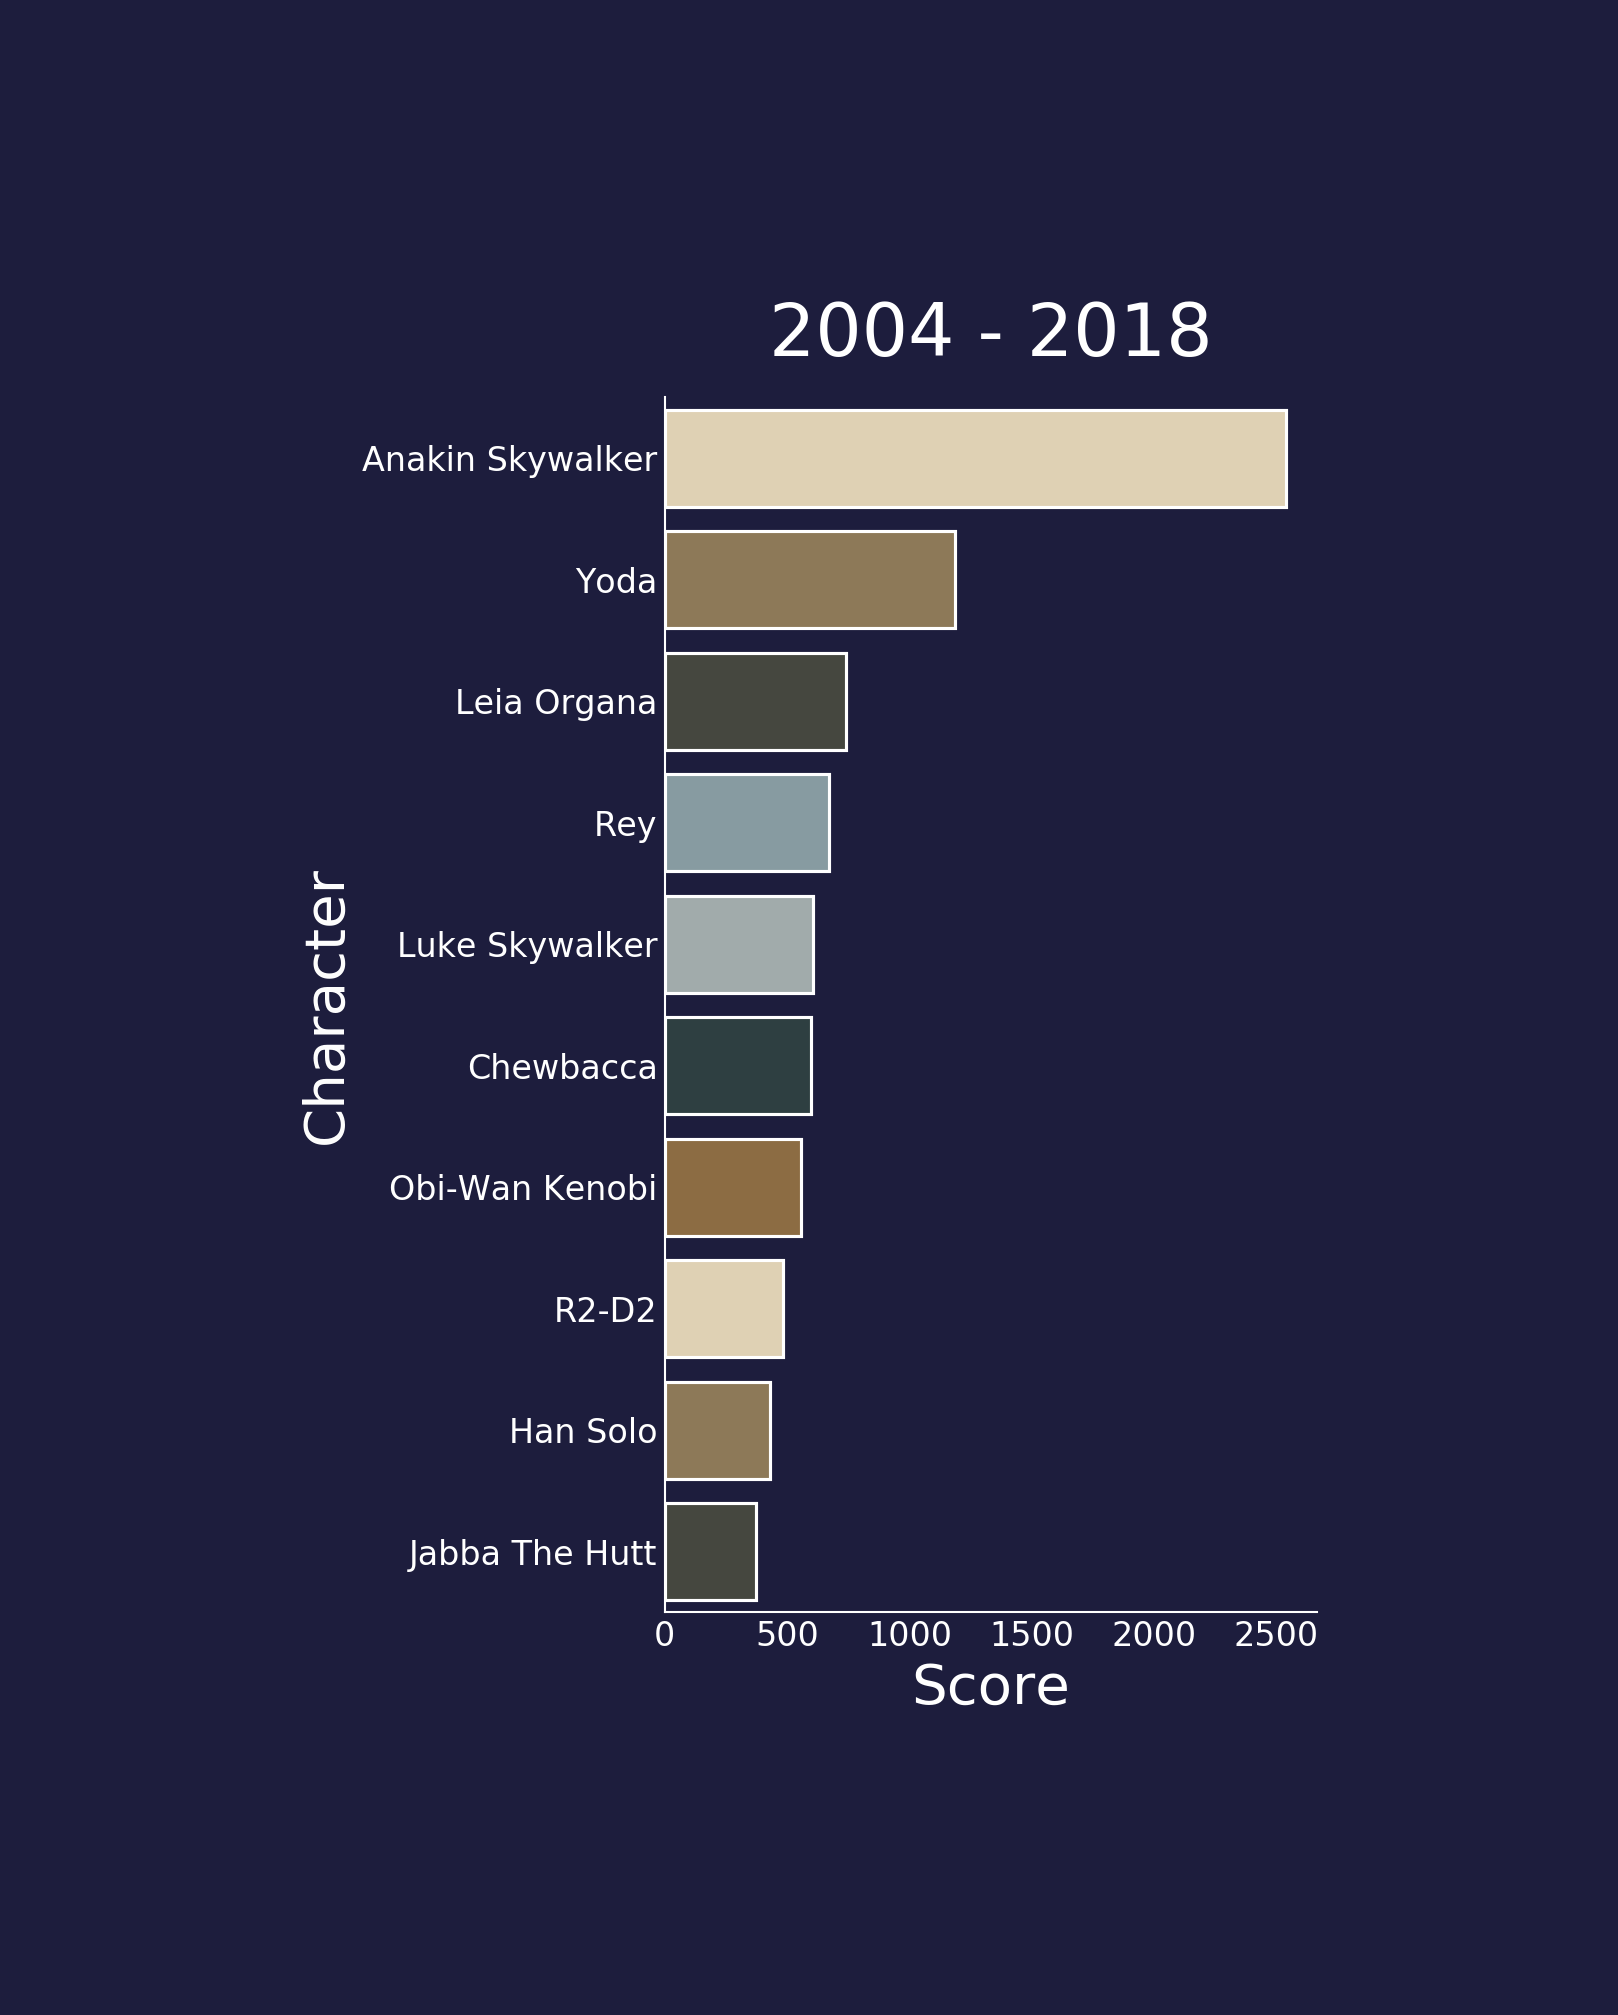

In [11]:
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/bluetrooper.mplstyle')
fig = plt.figure(figsize=(5,10))


#sns.set(font_scale = 0.8)


ax = sns.barplot(y="personajes", x='sum', orient="h", data = df_t.head(10), palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("2004 - 2018", pad=20, fontsize=35)
ax.set_xlabel("Score", fontsize=27)
ax.set_ylabel("Character", fontsize=27)
ax.grid(False)
plt.show()
fig.savefig('starwars_total.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

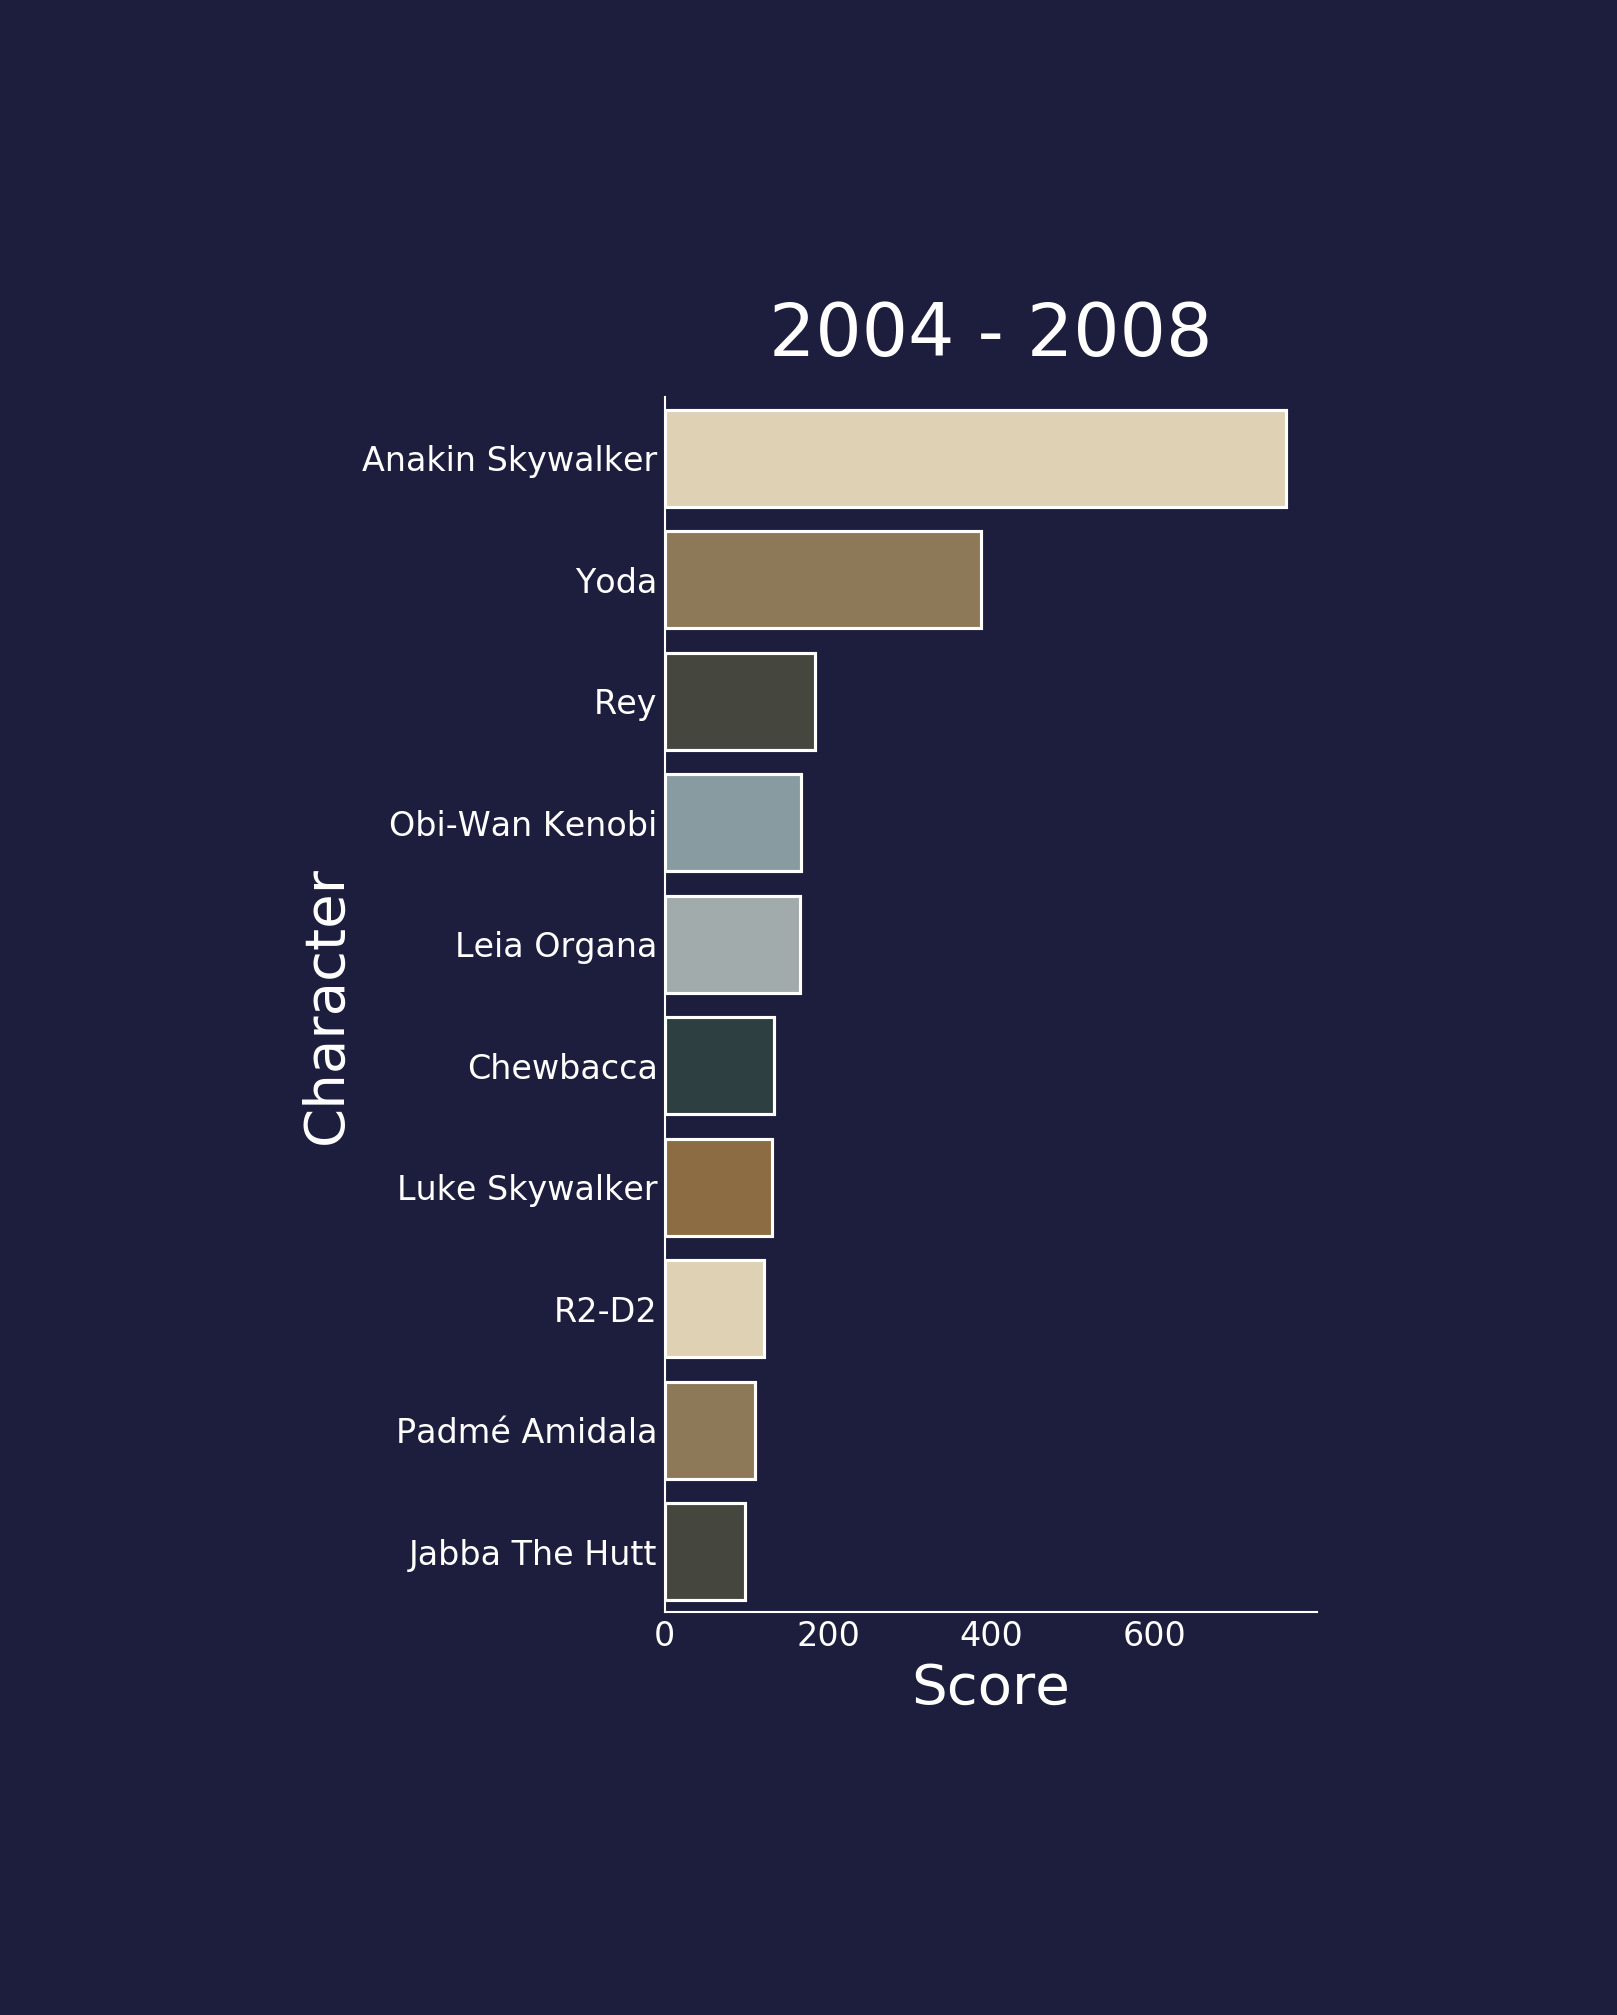

In [12]:
fig = plt.figure(figsize=(5,10))


#sns.set(font_scale = 0.8)


ax = sns.barplot(y="personajes", x='sum', orient="h", data = df_t_1.head(10), palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("2004 - 2008", pad=20, fontsize=35)
ax.set_xlabel("Score", fontsize=27)
ax.set_ylabel("Character", fontsize=27)
ax.grid(False)
plt.show()
fig.savefig('starwars_1.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

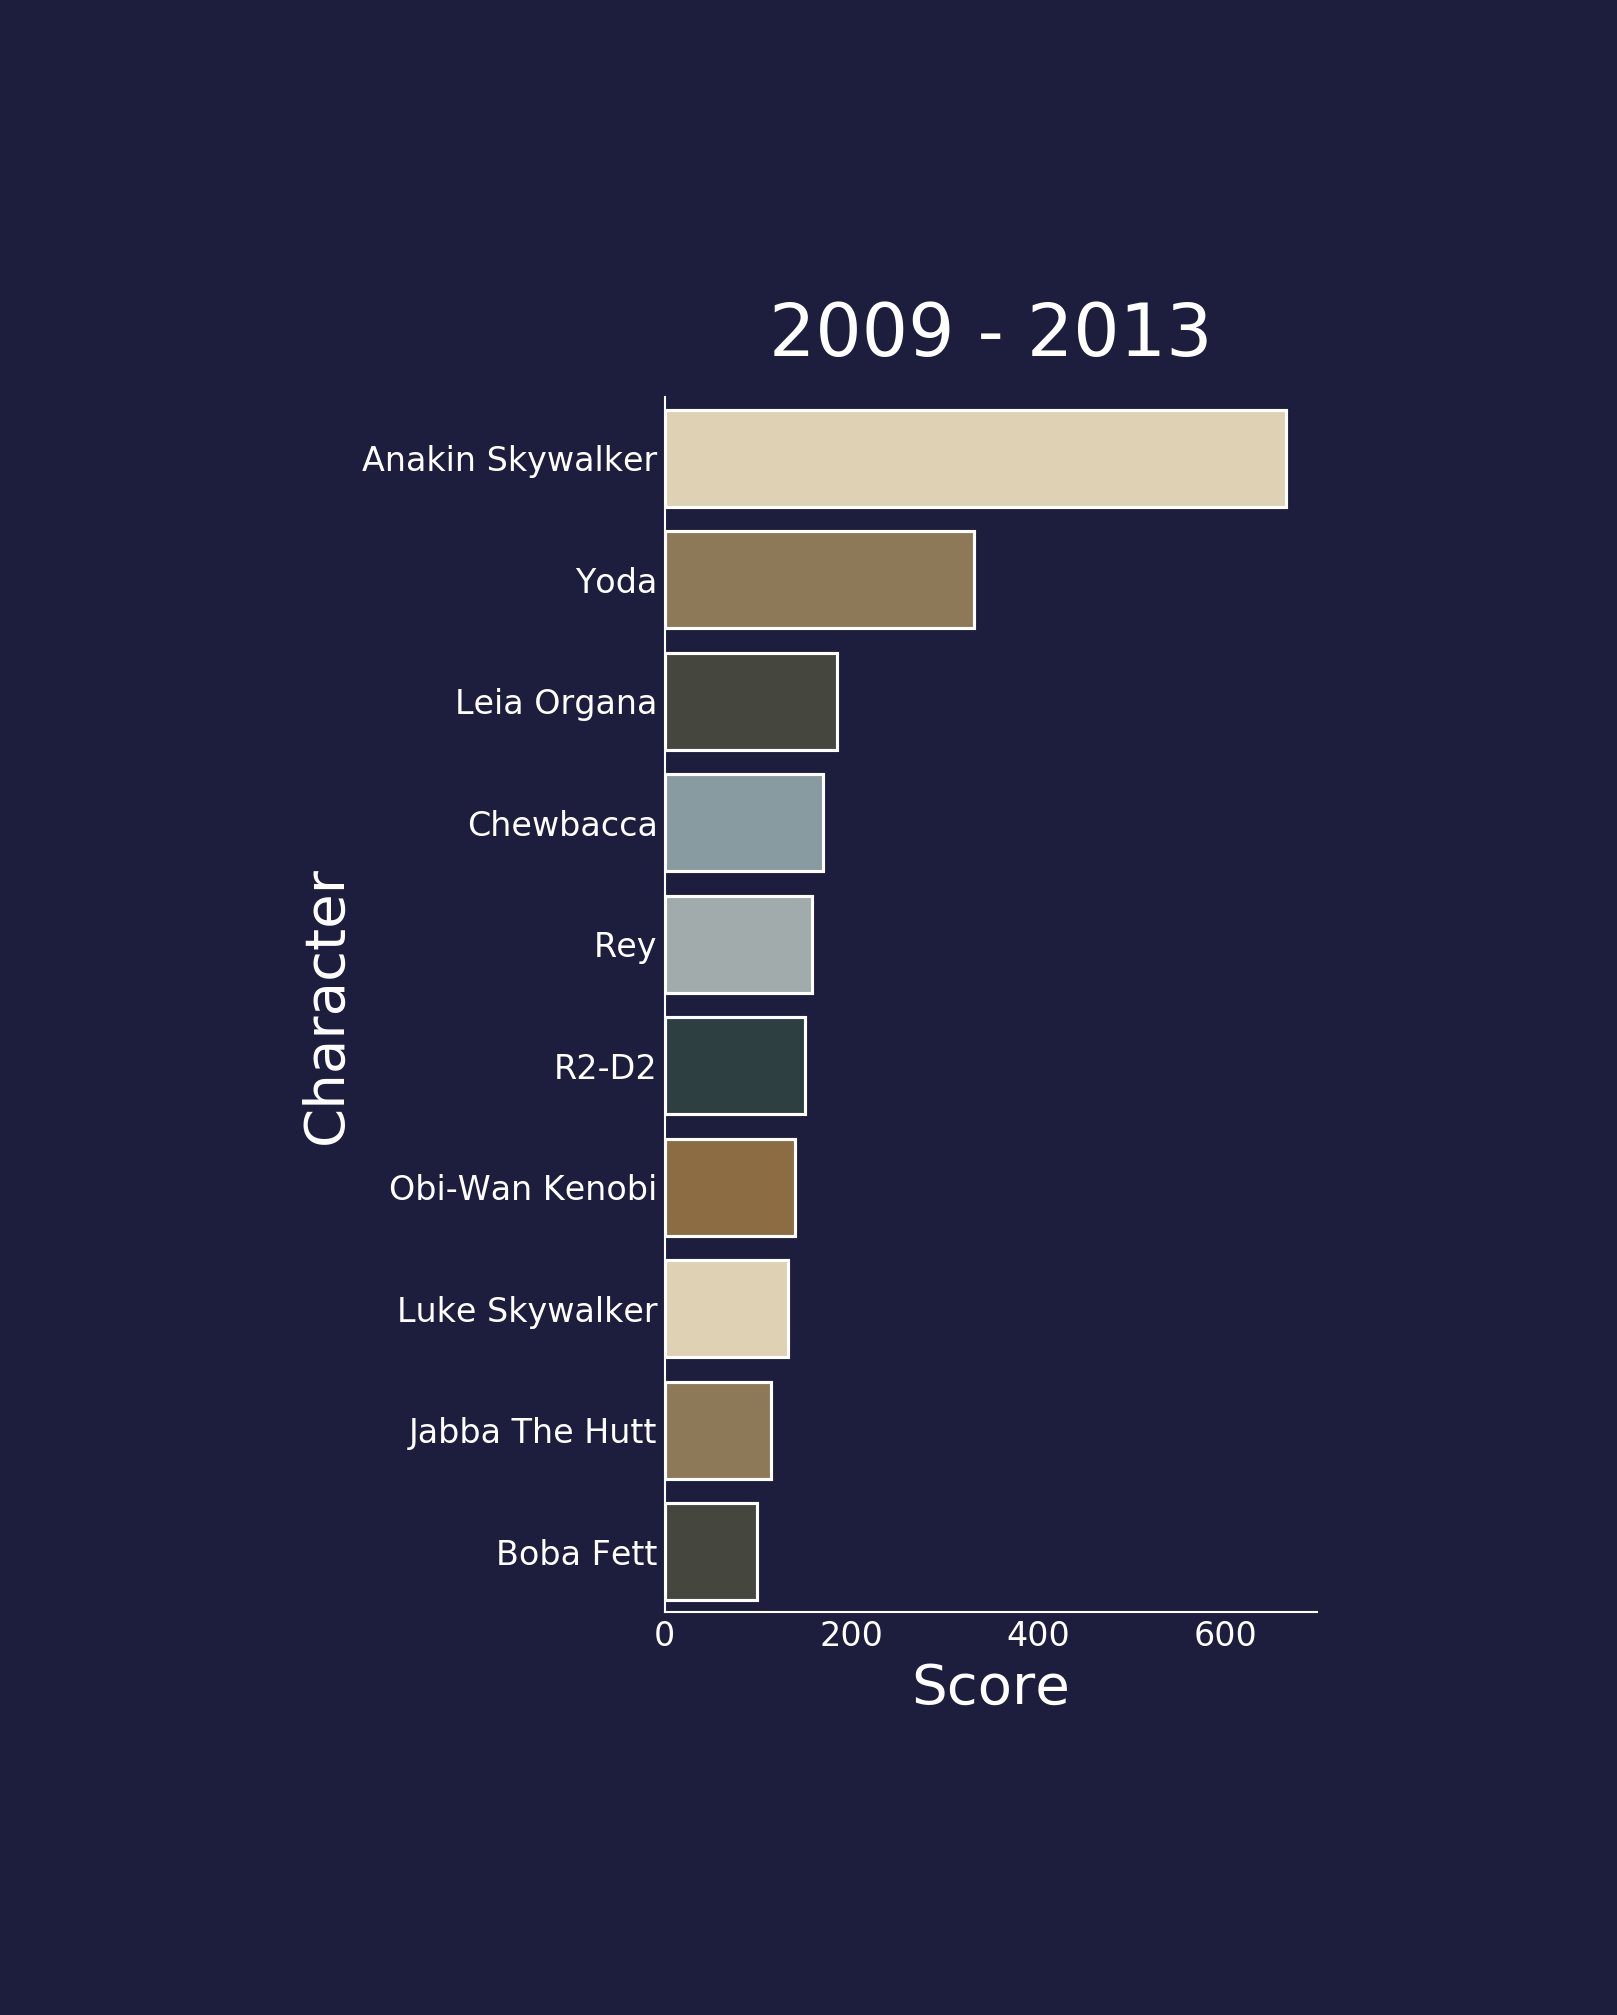

In [13]:
fig = plt.figure(figsize=(5,10))


#sns.set(font_scale = 0.8)


ax = sns.barplot(y="personajes", x='sum', orient="h", data = df_t_2.head(10), palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("2009 - 2013", pad=20, fontsize=35)
ax.set_xlabel("Score", fontsize=27)
ax.set_ylabel("Character", fontsize=27)
ax.grid(False)
plt.show()
fig.savefig('starwars_2.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

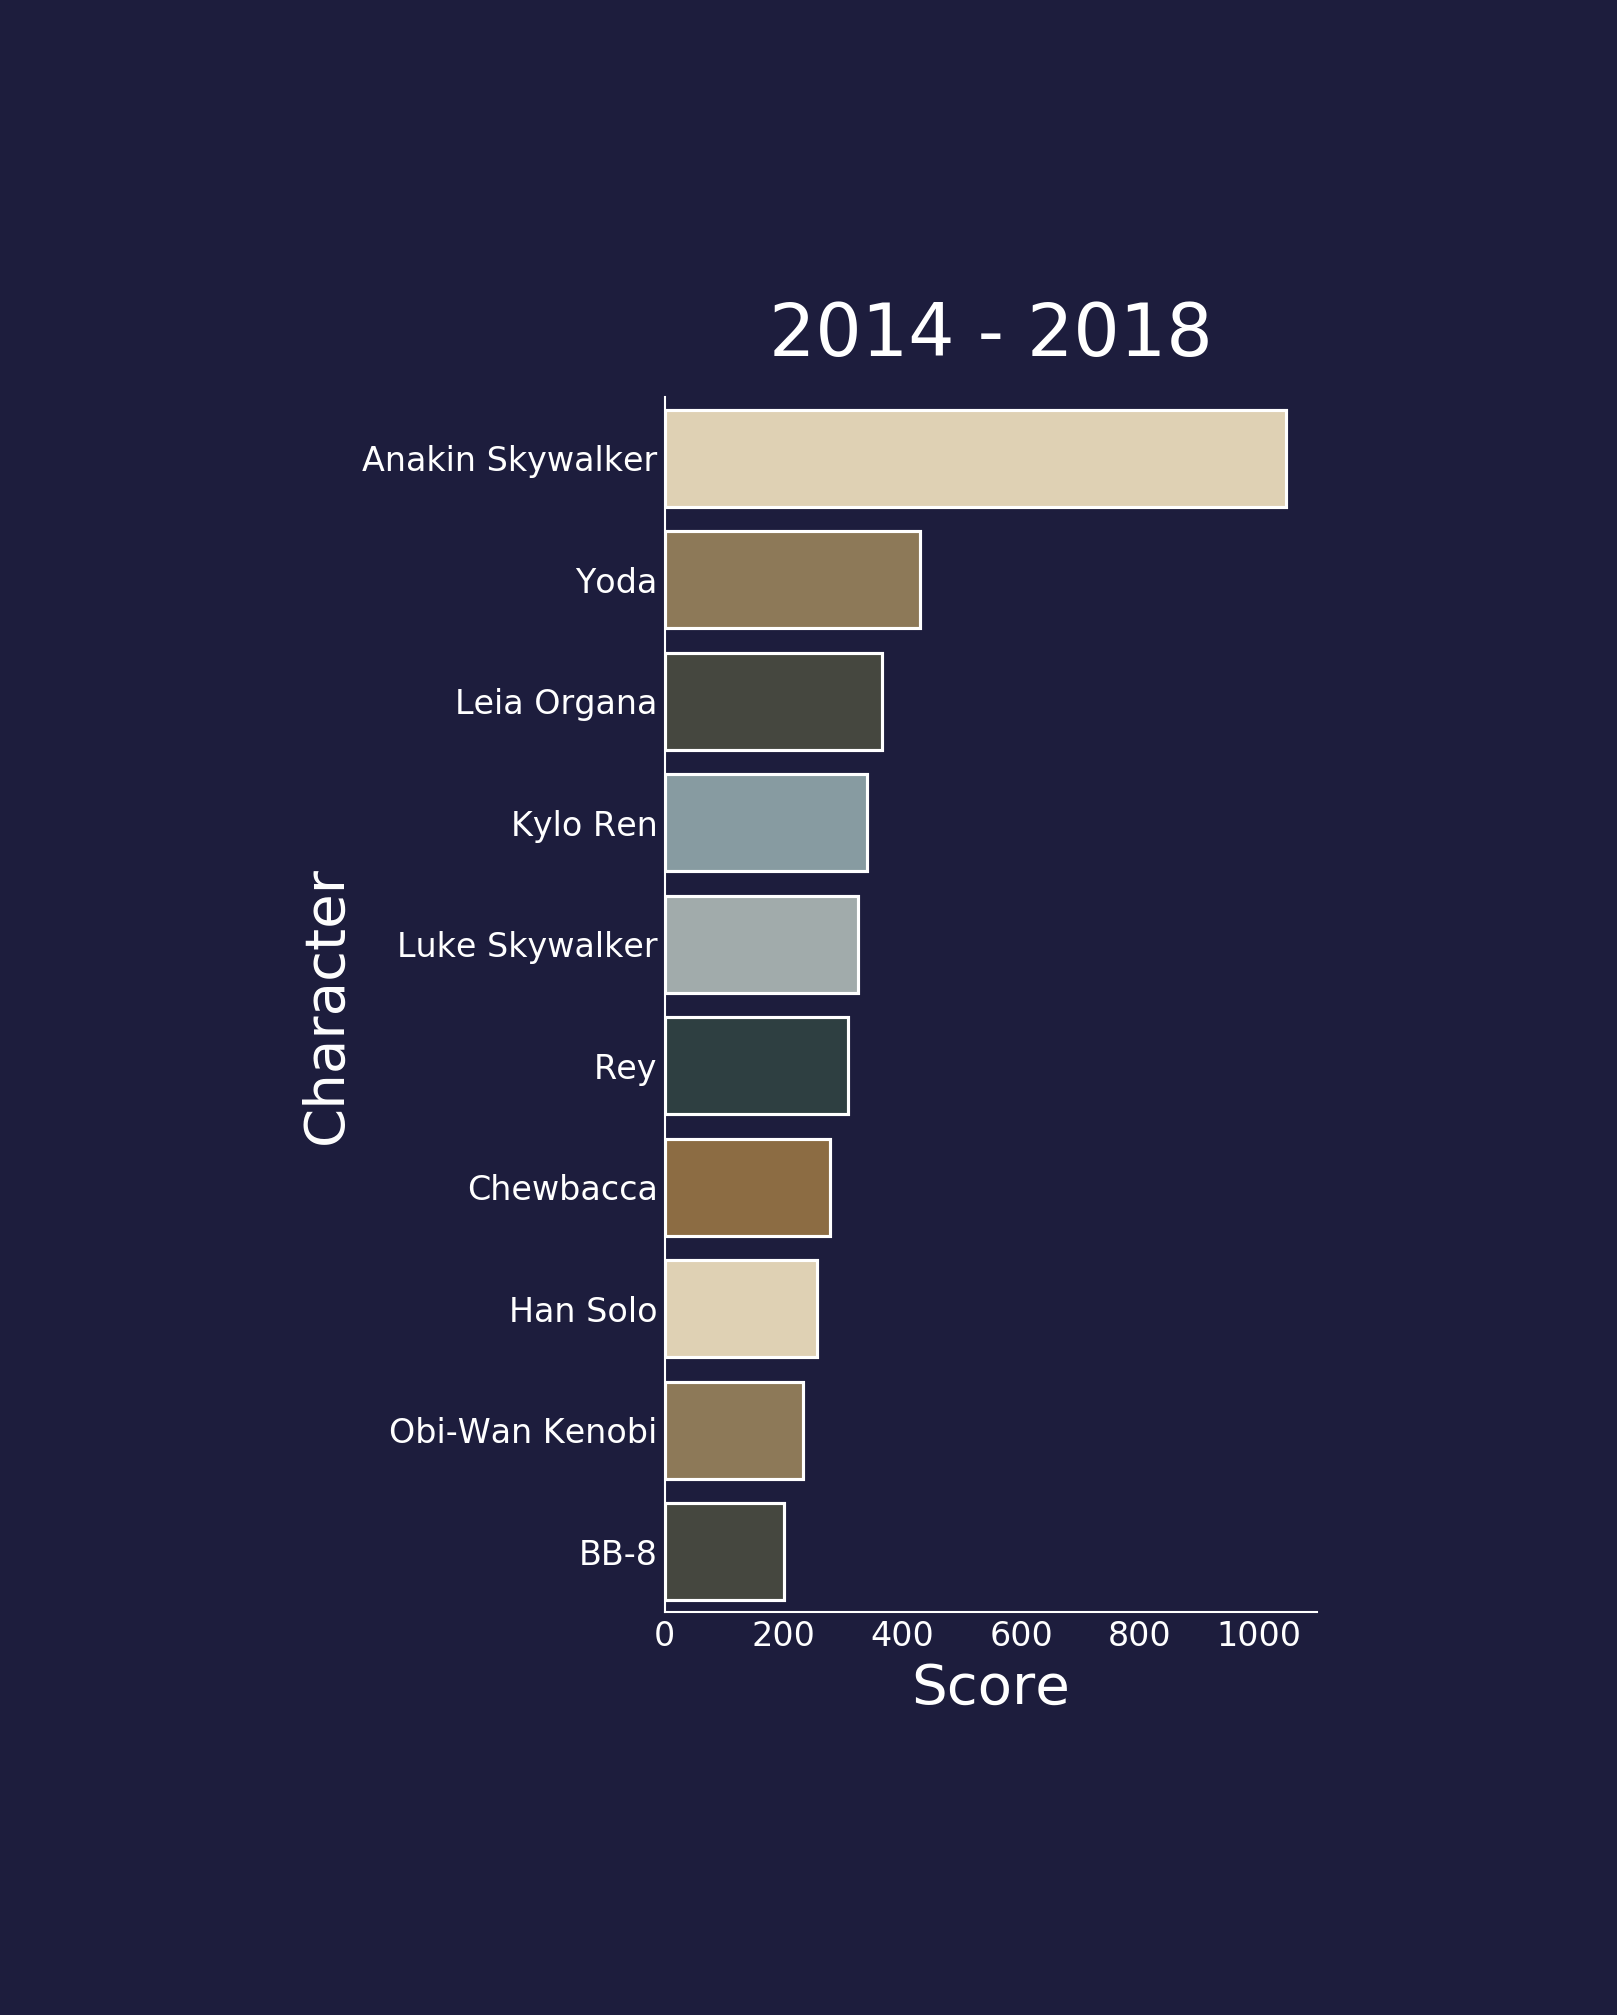

In [14]:
fig = plt.figure(figsize=(5,10))


#sns.set(font_scale = 0.8)


ax = sns.barplot(y="personajes", x='sum', orient="h", data = df_t_3.head(10), palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("2014 - 2018", pad=20, fontsize=35)
ax.set_xlabel("Score", fontsize=27)
ax.set_ylabel("Character", fontsize=27)
ax.grid(False)
plt.show()
fig.savefig('starwars_3.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

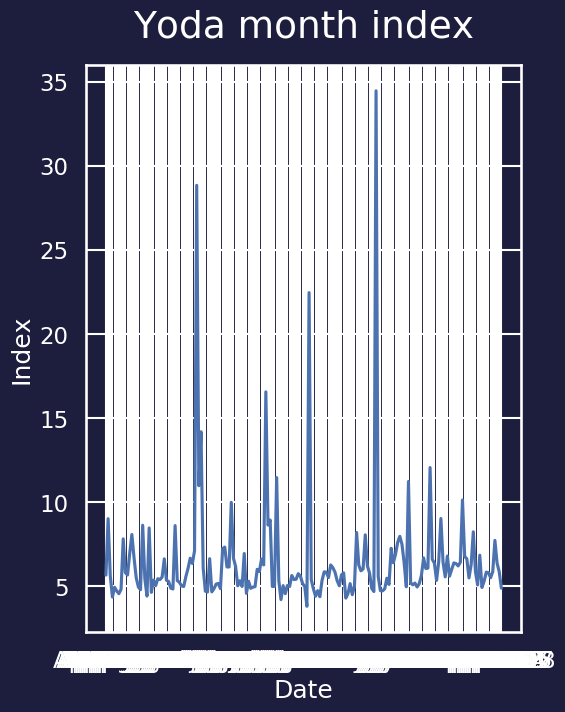

In [5]:
plt.figure(figsize=(5,7))
ax = sns.lineplot(x="Date", y="Yoda", data=df)#, color='#E6D3AD')

ax.set_title("Yoda month index", pad=20, fontsize=27)
plt.xlabel("Date")
plt.ylabel("Index")
plt.show()

In [10]:
df_p = df
del df_p['Date']
maxi = df_p.idxmax(axis=1)

In [13]:
pd.set_option('display.max_rows', df.shape[0]+1)
maxi

0      Anakin Skywalker
1      Anakin Skywalker
2      Anakin Skywalker
3      Anakin Skywalker
4      Anakin Skywalker
5      Anakin Skywalker
6      Anakin Skywalker
7      Anakin Skywalker
8      Anakin Skywalker
9      Anakin Skywalker
10     Anakin Skywalker
11     Anakin Skywalker
12     Anakin Skywalker
13     Anakin Skywalker
14     Anakin Skywalker
15     Anakin Skywalker
16     Anakin Skywalker
17     Anakin Skywalker
18     Anakin Skywalker
19     Anakin Skywalker
20     Anakin Skywalker
21     Anakin Skywalker
22     Anakin Skywalker
23     Anakin Skywalker
24     Anakin Skywalker
25     Anakin Skywalker
26     Anakin Skywalker
27     Anakin Skywalker
28     Anakin Skywalker
29     Anakin Skywalker
30     Anakin Skywalker
31     Anakin Skywalker
32     Anakin Skywalker
33     Anakin Skywalker
34     Anakin Skywalker
35     Anakin Skywalker
36     Anakin Skywalker
37     Anakin Skywalker
38     Anakin Skywalker
39     Anakin Skywalker
40     Anakin Skywalker
41     Anakin Sk

In [14]:
del df_p['Anakin Skywalker']
maxi = df_p.idxmax(axis=1)

In [16]:
maxi

0                   Yoda
1                   Yoda
2                   Yoda
3                   Yoda
4                   Yoda
5                   Yoda
6                   Yoda
7                   Yoda
8                   Yoda
9                   Yoda
10                  Yoda
11                  Yoda
12                  Yoda
13                  Yoda
14                  Yoda
15                  Yoda
16                  Yoda
17                  Yoda
18                  Yoda
19                  Yoda
20                  Yoda
21                  Yoda
22                  Yoda
23                  Yoda
24                  Yoda
25                  Yoda
26                  Yoda
27                  Yoda
28                  Yoda
29                  Yoda
30                  Yoda
31                  Yoda
32                  Yoda
33                  Yoda
34                  Yoda
35                  Yoda
36                  Yoda
37                  Yoda
38                  Yoda
39                  Yoda
